<h3>This program demonstrates a simple neural network (from Tech With Tim)</h3>

In [ ]:
#Load the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

<h1>About the Dataset: <a href='https://www.tensorflow.org/tutorials/keras/classification'>Link</a></h1>


<h1>2: Loading & Looking at Data</h1>

In [ ]:
#Load the dataset from Keras

data = keras.datasets.fashion_mnist

#Split into training and testing images and labels; images used to determine and predict labels

#Separated into train and test, further separated into images and labels
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Class names; these correspond to the index that will be outputted by the model
#Example: output 0 corresponds to T-shirt/top, output 2 corresponds to Pullover, etc

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training Labels: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7, 0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1, 1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9, 5, 6, 0, 5, 0, 1, 6, 1, 1, 6, 7, 4, 4, 8, 6, 4, 6, 9, 3, 7, 5, 0, 8, 3, 4, 0, 3, 3

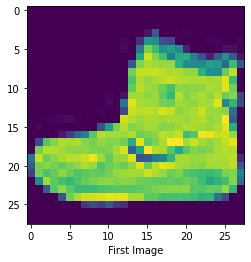

In [ ]:
#Training labels that correspond:
#1) To the training images of the same index, so first image is a 9
#2) The number corresponds to the class_names list above: the first value is index 9, meaning the first image an label is ankle boot
print('Training Labels: {}'.format(train_labels.tolist()))
print('\n')

print('First image is a(n): {}'.format(class_names[train_labels[0]]))
print('\n')

#Display the first image
plt.imshow(train_images[0]) #, cmap=plt.cm.binary) #2nd argument makes image grayscale
plt.xlabel('First Image')
plt.show()

In [ ]:
#Divide all the pixel values (0-255) in train and test images by 255

train_images = train_images/255.0

test_images = test_images/255.0

<h1>3: Creating a Model</h1>

In [ ]:
#Create the model, 1 hidden layer

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #First/input layer with flattened array
                          keras.layers.Dense(128, activation='relu'), #2nd layer, or hidden layer. Dense means every neuron is full connected to another layer. First argument is # of neurons in this layer
                          keras.layers.Dense(10, activation='softmax') #3rd and final/output layer with 10 neurons and dense
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Apparently choosing the parameters is "somewhat arbitrary"

In [ ]:
#Epochs are # of times model will see data, not to be confused with iteration
#In this case, data will go through model 5 times, each time adjusting weights and biases
#Amount of epochs for optimum accuracy is determined via trial and error
#Usually, the model improves with each epoch for some time, then stabilizes after which more epochs becomes redundant

#Fit/Train the model to the training images to training labels

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4985 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8921


In [ ]:
#Test the accuracy of model using the testing data
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3864 - accuracy: 0.8617


In [ ]:
#Score using test_acc variable
print('Tested Accuracy: {}'.format(test_acc))

Tested Accuracy: 0.8616999983787537


<h1>4: Using the Model to Make Predictions</h1>

In [ ]:
#Predict test_images to output precited labels
prediction = model.predict(test_images) #can use np array or list

print(prediction)

#In the outputted array, each sub-array corresponds to an image by index; 
#each value inside each sub-array corresponds to a value in the class_names list by index, 
#with each value representing the certainty that the image corresponds to the index label

[[3.7922956e-07 6.3334838e-08 1.0474105e-07 ... 5.9771133e-03
  1.6573911e-04 9.9165291e-01]
 [5.7285238e-04 3.1374164e-10 9.8486531e-01 ... 8.8892149e-10
  4.8055363e-06 1.7272856e-12]
 [1.5002600e-07 9.9999940e-01 3.5850675e-10 ... 1.0043658e-14
  8.5782963e-09 9.4198277e-14]
 ...
 [6.2740466e-05 7.2384680e-09 1.9973962e-05 ... 9.8657731e-09
  9.9975985e-01 3.0449407e-08]
 [3.3909134e-07 9.9975985e-01 2.1575929e-08 ... 7.1055946e-11
  9.2922541e-08 7.0002986e-09]
 [2.3087878e-03 1.2111092e-05 9.1140845e-04 ... 2.8715275e-02
  3.6769487e-02 4.6352742e-04]]


In [ ]:
#Use the max value in each sub-array, find its index, then use that to as class_names[index] to
#return the most probable item as predicted by the trained model

print(np.argmax(prediction[0])) #Return the index of the highest value in the first sub-array representing the first image using argmax

#Outputs 9, so model predicts first image is an ankle boot
print(class_names[np.argmax(prediction[0])])

9
Ankle boot


In [ ]:
#Going through first 10 test_images

i = 1
for subarray in range(len(prediction)):
  print('Predicted Image '+str(i)+': '+ class_names[np.argmax(prediction[subarray])])
  i+=1
  if i == 11:
    break

Predicted Image 1: Ankle boot
Predicted Image 2: Pullover
Predicted Image 3: Trouser
Predicted Image 4: Trouser
Predicted Image 5: Shirt
Predicted Image 6: Trouser
Predicted Image 7: Coat
Predicted Image 8: Shirt
Predicted Image 9: Sandal
Predicted Image 10: Sneaker


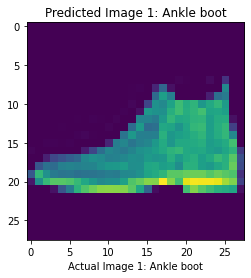

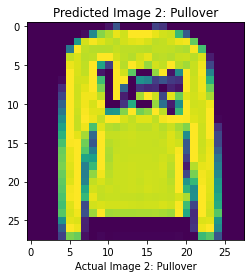

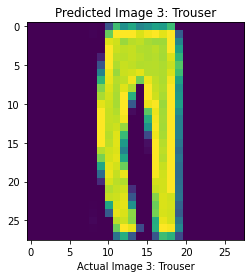

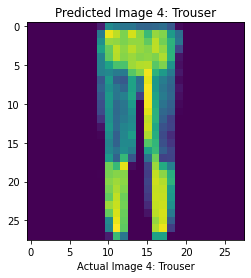

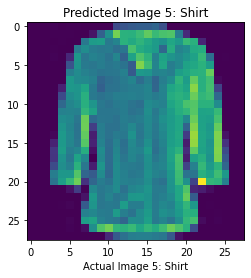

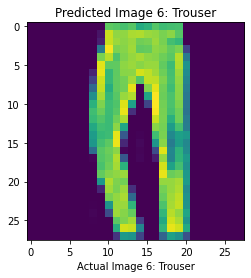

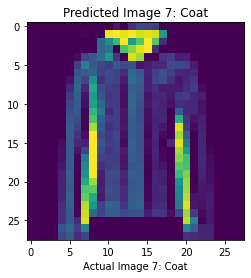

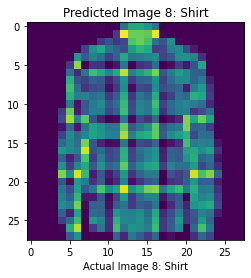

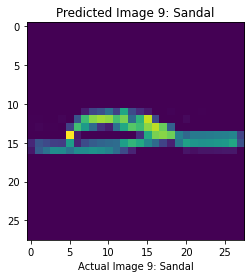

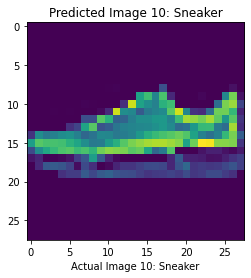

In [ ]:
#Same as above but with the images and labels for predicted and actual 

i = 0
for i in range(len(test_images)):
  plt.title('Predicted Image '+str(i+1)+': '+ class_names[np.argmax(prediction[i])])
  plt.xlabel('Actual Image '+str(i+1)+': '+ class_names[test_labels[i]])
  plt.imshow(test_images[i])
  plt.show()
  i+=1
  if i == 10:
    break

<h1>5: Text Classification</h1>

In [ ]:
#Load data for sentiment analysis
data = keras.datasets.imdb

#Split into train and test data
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000) #Select 10000 most frequent words

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
word_index = data.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

#Reverse the keys and values
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#Preprocessing
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=250)

#Create function to return readable keys
def decode_review(text):
  result = ''.join([reverse_word_index.get(i,'?') for i in text])
  return result

print(decode_review(test_data[0]))

print(len(test_data[0]), len(test_data[1]))

<START>pleasegivethisoneamissbrbr<UNK><UNK>andtherestofthecastrenderedterribleperformancestheshowisflatflatflatbrbridon'tknowhowmichaelmadisoncouldhaveallowedthisoneonhisplatehealmostseemedtoknowthiswasn'tgoingtoworkoutandhisperformancewasquite<UNK>soallyoumadisonfansgivethisamiss<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD

In [ ]:
#Create the deep learning model

model = keras.Sequential()

model.add(keras.layers.Embedding(88000,16)) #layer 1
model.add(keras.layers.GlobalAveragePooling1D()) #layer 2
model.add(keras.layers.Dense(16, activation='relu')) #layer 3
model.add(keras.layers.Dense(1, activation='sigmoid')) #layer 4

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Choosing 10000 reviews out of the 25000 available
X_val = train_data[:10000]
X_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

fitModel = model.fit(X_train, y_train, epochs=40, batch_size=512, validation_data=(X_val,y_val), verbose=1)

#Data and labels must be preprocessed
results = model.evaluate(test_data,test_labels)

#Remember, every epoch is the data going through the model once to increase accuracy of model. Eventually,

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 16)          1408000   
_________________________________________________________________
global_average_pooling1d_13  (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
30/30 [==============================] - 2s 37ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 2/40
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.5081 -

In [ ]:
print(results)

#Save this specific trained model
model.save('model.h5')

[1.0342285633087158, 0.5004000067710876]


In [ ]:
#Load the trained model

model = keras.models.load_model('model.h5')

In [ ]:
#Going to use this unseen text data for the trained model

from urllib.request import urlopen

url = 'https://techwithtim.net/wp-content/uploads/2019/05/test.txt'

page = urlopen(url)

html_bytes = page.read()

string = html_bytes.decode('utf-8')

#Unmodified
print(string)

#Replace some characters with empty space
chars = [',','.','(',')',':','\"']

for char in chars:
  string = string.replace(char,'').strip()

#Modified
print(string)

#Encoding
def review_encode(s):
  encoded = [1]

  for word in s:
    if word in word_index:
      encoded.append(word_index[word.lower()])
    else:
      encoded.append(2)

  return encoded

encode = review_encode(string)
encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding='post', maxlen=250)

model.predict(encode) #99% accuracy

Of all the animation classics from the Walt Disney Company, there is perhaps none that is more celebrated than "The Lion King." Its acclaim is understandable: this is quite simply a glorious work of art."The Lion King" gets off to a fantastic start. The film's opening number, "The Circle of Life," is outstanding. The song lasts for about four minutes, but from the first sound, the audience is floored. Not even National Geographic can capture something this beautiful and dramatic. Not only is this easily the greatest moment in film animation, this is one of the greatest sequences in film history. The story that follows is not as majestic, but the film has to tell a story. Actually, the rest of the film holds up quite well. The story takes place in Africa, where the lions rule. Their king, Mufasa (James Earl Jones) has just been blessed with a son, Simba (Jonathan Taylor Thomas), who goes in front of his uncle Scar (Jeremy Irons) as next in line for the throne. Scar is furious, and sets 

array([[0.9986888]], dtype=float32)